<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [2]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [3]:


START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
data = load_data('NVDA')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,5.0325,5.0700,4.9525,5.0325,4.832578,11368000
1,2015-01-05,5.0325,5.0475,4.9250,4.9475,4.750955,19795200
2,2015-01-06,4.9550,4.9600,4.7925,4.7975,4.606914,19776400
3,2015-01-07,4.8325,4.8750,4.7700,4.7850,4.594910,32180800
4,2015-01-08,4.8400,4.9950,4.8375,4.9650,4.767760,28378000


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,5.0325,5.0700,4.9525,5.0325,11368000
1,5.0325,5.0475,4.9250,4.9475,19795200
2,4.9550,4.9600,4.7925,4.7975,19776400
3,4.8325,4.8750,4.7700,4.7850,32180800
4,4.8400,4.9950,4.8375,4.9650,28378000


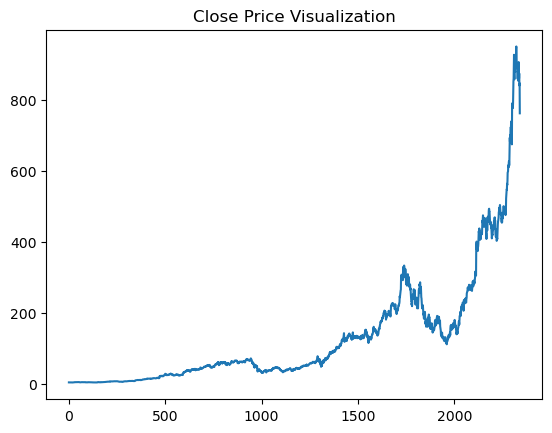

In [6]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,5.032500,5.070000,4.952500,5.032500,11368000
1,5.032500,5.047500,4.925000,4.947500,19795200
2,4.955000,4.960000,4.792500,4.797500,19776400
3,4.832500,4.875000,4.770000,4.785000,32180800
4,4.840000,4.995000,4.837500,4.965000,28378000
...,...,...,...,...,...
2335,890.979980,906.130005,859.289978,860.010010,44307700
2336,864.330017,881.179993,860.640015,874.150024,37045300
2337,883.400024,887.750000,839.500000,840.349976,49540000
2338,849.700012,861.900024,824.020020,846.710022,44726000


# Plotting moving averages of 100 day

---



In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2335    673.755199
2336    677.455800
2337    680.864899
2338    684.460399
2339    687.302799
Name: Close, Length: 2340, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

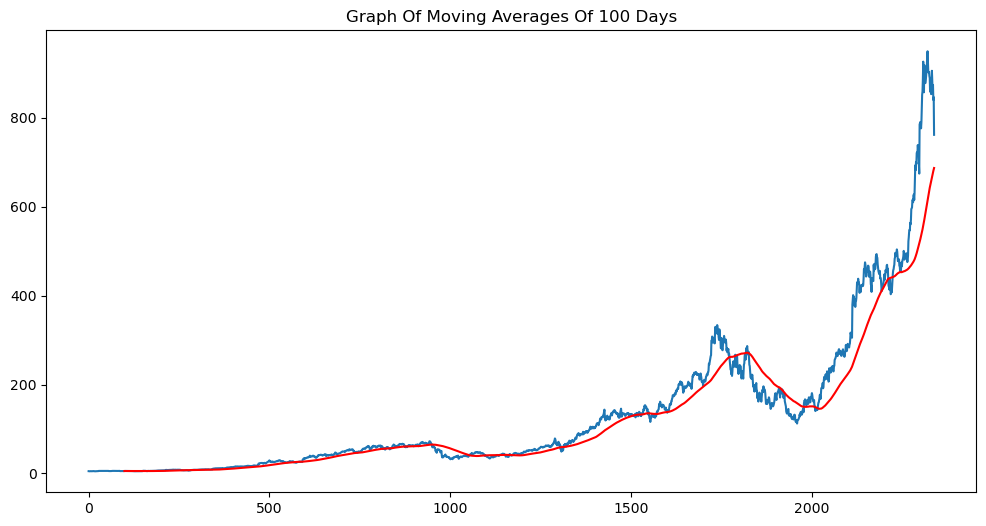

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2335    560.67860
2336    563.00825
2337    565.09490
2338    567.20780
2339    568.90195
Name: Close, Length: 2340, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

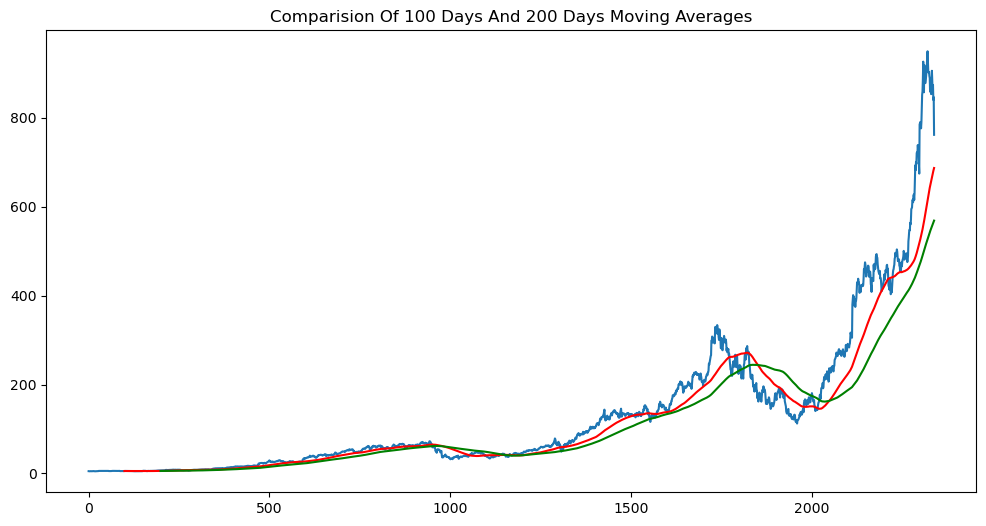

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [12]:
df.shape

(2090, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [13]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1638, 7)
(702, 7)


In [14]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,5.0325,5.0700,4.9525,5.0325,4.832578,11368000
1,2015-01-05,5.0325,5.0475,4.9250,4.9475,4.750955,19795200
2,2015-01-06,4.9550,4.9600,4.7925,4.7975,4.606914,19776400
3,2015-01-07,4.8325,4.8750,4.7700,4.7850,4.594910,32180800
4,2015-01-08,4.8400,4.9950,4.8375,4.9650,4.767760,28378000


In [15]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1638,2021-07-07,208.535004,208.750000,203.320007,203.717499,203.366592,41842800
1639,2021-07-08,198.565002,201.330002,197.007507,199.027496,198.684692,50330000
1640,2021-07-09,199.625000,200.802505,197.542496,200.502502,200.157150,29662400
1641,2021-07-12,202.399994,205.327499,201.877502,205.125000,204.771667,32198400
1642,2021-07-13,204.005005,204.612503,201.139999,202.500000,202.151199,29070800


# Using MinMax scaler for normalization of the dataset

---



In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [20]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[1.22403532e-03],
       [8.03661626e-04],
       [6.18213949e-05],
       ...,
       [9.75939637e-01],
       [9.89540032e-01],
       [1.00000000e+00]])

In [21]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [22]:
x_train.shape

(1538, 100, 1)

# ML Model (LSTM)

---



In [23]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

# Training the model

---



In [27]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 50)

NameError: name 'x_test' is not defined

In [42]:
model.save('keras_model.h5')

In [ ]:

test_close.shape
test_close

In [54]:
past_100_days = pd.DataFrame(train_close[-100:])

In [55]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [56]:
final_df = past_100_days.append(test_df, ignore_index = True)

<ipython-input-56-50640d85f7a0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_df, ignore_index = True)


In [58]:
final_df.head()

,0
0,81.279999
1,80.580002
2,82.875000
3,83.364998
4,85.997498


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [60]:
input_data.shape

(727, 1)

# Testing the model

---



In [62]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [64]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(627, 100, 1)
(627,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [28]:
# Making predictions

y_pred = model.predict(x_test)

NameError: name 'x_test' is not defined

In [66]:
y_pred.shape

(627, 1)

In [67]:
y_test

array([0.33974171, 0.33984032, 0.35512175, 0.30188305, 0.34250222,
       0.27881298, 0.27792563, 0.29439025, 0.33885436, 0.37907917,
       0.37572714, 0.35236124, 0.3489106 , 0.3836143 , 0.38085379,
       0.38134677, 0.39160016, 0.38262842, 0.36922015, 0.37523415,
       0.3624174 , 0.32800946, 0.34102335, 0.34950211, 0.35502314,
       0.37927639, 0.41545896, 0.41900821, 0.41762796, 0.41082521,
       0.42561374, 0.43182489, 0.40619146, 0.42058562, 0.41240269,
       0.40619146, 0.46633145, 0.46564132, 0.47441584, 0.45430351,
       0.46978209, 0.50576759, 0.49669731, 0.50665487, 0.55318944,
       0.53524595, 0.52390815, 0.51375337, 0.48141581, 0.49719014,
       0.45371192, 0.49630287, 0.50744361, 0.47717635, 0.4754018 ,
       0.49600711, 0.4764863 , 0.4590358 , 0.46583854, 0.50724638,
       0.55496399, 0.57665395, 0.61461107, 0.61697729, 0.60613231,
       0.55713298, 0.50655633, 0.52804891, 0.53642914, 0.52607714,
       0.56009072, 0.55387949, 0.55535843, 0.54648523, 0.54037

In [ ]:
y_pred

In [69]:
scaler.scale_

array([0.00985902])

In [70]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

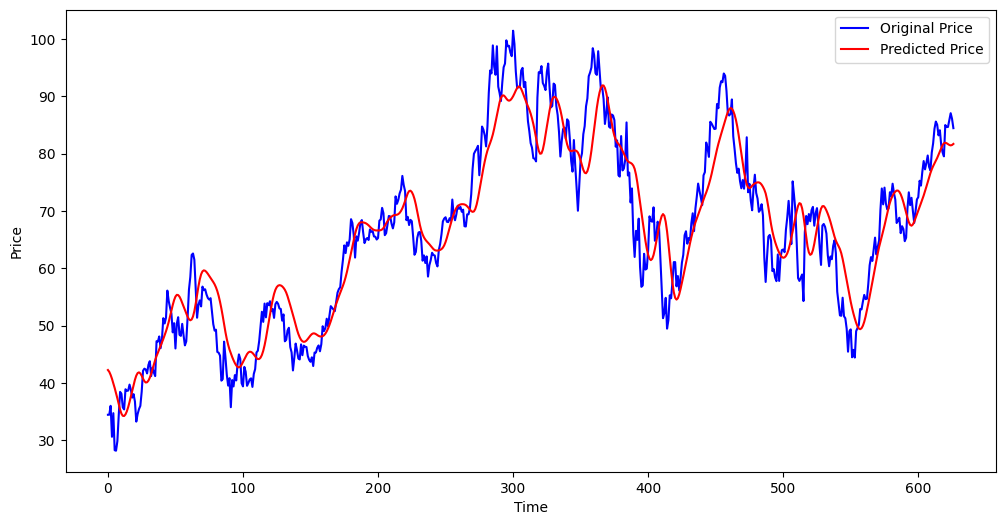

In [71]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

In [76]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  4.542532119013522
